In [1]:
import calliope
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# For now, let's look at the system without island links. First, we load the results file

solved_model_no_links = calliope.read_netcdf('system_without_island_links.nc') # loads the model results

/opt/tljh/user/lib/python3.9/site-packages/calliope/exceptions.py:60: ModelWarning:

This model data was created with Calliope version 0.6.8, but you are running 0.6.10. Proceed with caution!



In [3]:
# Now, we extract the total installed capacity (including generation, storage, transmission, and demand)

total_capacity_no_links = solved_model_no_links.get_formatted_array('energy_cap').T.to_pandas() # installed capacities in MW

In [4]:
total_capacity_no_links

locs,Aceh,Bali,Banten,Bengkulu,Daerah_Istimewa_Yogyakarta,Daerah_Khusus_Ibukota_Jakarta,Gorontalo,Jambi,Jawa_Barat,Jawa_Tengah,...,Papua_Barat,Riau,Sulawesi_Barat,Sulawesi_Selatan,Sulawesi_Tengah,Sulawesi_Tenggara,Sulawesi_Utara,Sumatera_Barat,Sumatera_Selatan,Sumatera_Utara
techs,,,,,,,,,,,,,,,,,,,,,
ac_transmission:Aceh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.649467
ac_transmission:Bali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_transmission:Banten,NaN,NaN,NaN,NaN,NaN,748.546951,NaN,NaN,5818.097430,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_transmission:Bengkulu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.743047,29.929761,NaN
ac_transmission:Daerah_Istimewa_Yogyakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991.909017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_transmission:Daerah_Khusus_Ibukota_Jakarta,NaN,NaN,748.546951,NaN,NaN,NaN,NaN,NaN,15159.334336,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac_transmission:Gorontalo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.933029,NaN,35.133081,NaN,NaN,NaN
ac_transmission:Jambi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.598562,NaN,NaN,NaN,NaN,NaN,76.202492,113.301003,NaN
ac_transmission:Jawa_Barat,NaN,NaN,5818.097430,NaN,NaN,15159.334336,NaN,NaN,NaN,20695.192733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# let's look at generation capacity first, so let's remove demand, transmission, and storage from the dataset.
# (filler_gen is used if demand cannot be fully met by renewables and nuclear)
# also, let's convert the capacities from MW to GW

capacity_gen_no_links = total_capacity_no_links[(total_capacity_no_links.index.str.contains('demand_power')==False) &
                                                  (total_capacity_no_links.index.str.contains('transmission')==False) &
                                                  (total_capacity_no_links.index.str.contains('battery')==False) &
                                                  (total_capacity_no_links.index.str.contains('pumped_hydro')==False) &
                                                  (total_capacity_no_links.index.str.contains('filler_gen')==False)]/1000

In [6]:
capacity_gen_no_links

locs,Aceh,Bali,Banten,Bengkulu,Daerah_Istimewa_Yogyakarta,Daerah_Khusus_Ibukota_Jakarta,Gorontalo,Jambi,Jawa_Barat,Jawa_Tengah,...,Papua_Barat,Riau,Sulawesi_Barat,Sulawesi_Selatan,Sulawesi_Tengah,Sulawesi_Tenggara,Sulawesi_Utara,Sumatera_Barat,Sumatera_Selatan,Sumatera_Utara
techs,,,,,,,,,,,,,,,,,,,,,
biomass,1.136598,0.146901,0.346502,0.118966,0.183101,NaN,0.119100,0.921032,1.979802,1.884102,...,0.050802,3.689737,0.197801,0.890301,0.307400,0.132801,0.150201,0.923100,2.061395,2.796099
geothermal,0.540003,0.244005,0.323002,0.629998,0.010005,NaN,0.020003,0.372999,2.094802,0.812002,...,0.000000,0.000000,0.030000,0.139000,0.295999,0.092000,0.670003,0.744999,0.369000,1.393399
large_hydro,0.000046,0.208005,0.000000,0.000132,0.000000,NaN,0.000000,0.649550,2.861005,0.813005,...,0.000000,0.001109,0.000000,0.581430,1.032896,0.299570,0.516950,0.000423,0.721617,0.000267
nuclear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offshore_wind,0.000017,NaN,0.325502,0.000016,NaN,NaN,NaN,0.000015,34.421003,39.841002,...,0.000047,0.000016,0.000022,0.000033,NaN,NaN,NaN,NaN,0.000017,NaN
onshore_wind,0.000035,0.457502,0.702502,0.000032,2.170002,NaN,0.000044,0.000032,11.087501,19.514998,...,0.000068,0.000031,0.000046,0.000047,0.000034,0.000047,0.000042,0.000027,0.000026,0.000022
otec,0.000024,2.040005,3.808002,0.000027,3.536005,NaN,0.000032,NaN,5.712002,1.360002,...,0.000053,NaN,0.000032,0.000035,0.000030,0.000035,0.000031,0.000030,NaN,0.000030
small_hydro,0.000029,0.016005,0.053605,0.000053,0.120202,NaN,0.000064,0.000071,1.292005,0.903005,...,0.000489,0.000068,0.000106,0.000074,0.000073,0.000073,0.000070,0.000062,0.000087,0.000067
solar,5.594439,10.721002,3.395005,0.701922,0.030205,NaN,2.198621,0.749442,5.557005,4.044005,...,5.850430,3.299400,0.924530,24.065062,0.008668,3.330206,2.424701,8.709380,13.050343,38.671756


In [7]:
# let's show the capacities on the national level
capacity_gen_national_no_links = capacity_gen_no_links.T.sum()
capacity_gen_national_no_links  = capacity_gen_national_no_links .rename('Without island links')

In [8]:
capacity_gen_national_no_links

techs
biomass           28.169093
geothermal        12.204741
large_hydro       12.075706
nuclear            0.000058
offshore_wind     95.967501
onshore_wind      64.066199
otec              26.928696
small_hydro        2.933593
solar            287.314453
Name: Without island links, dtype: float64

In [9]:
# let's do the same thing for installed storage capacity, generation, and levelised cost

# installed storage capacity

capacity_stor_no_links = total_capacity_no_links[(total_capacity_no_links.index.str.contains('battery')==True) |
                                               (total_capacity_no_links.index.str.contains('pumped_hydro')==True)]/1000 # conversion from MW to GW

capacity_stor_national_no_links = capacity_stor_no_links.T.sum()  
capacity_stor_national_no_links = capacity_stor_national_no_links.rename('Without island links')

In [10]:
capacity_stor_national_no_links

techs
battery         1421.854572
pumped_hydro     595.209813
Name: Without island links, dtype: float64

In [11]:
# generation in MWh

generation_no_links = solved_model_no_links.get_formatted_array('carrier_prod').loc[{'carriers':'power'}].sum('locs').to_pandas()

In [12]:
# remove demand, transmission, and storage
# also, convert from MWh to TWh

generation_no_links = generation_no_links[(generation_no_links.index.str.contains('demand_power')==False) & 
                                        (generation_no_links.index.str.contains('transmission')==False) &
                                        (generation_no_links.index.str.contains('battery')==False) &
                                        (generation_no_links.index.str.contains('pumped_hydro')==False) &
                                        (generation_no_links.index.str.contains('filler_gen')==False)].T/1000000

In [13]:
generation_no_links

techs,biomass,geothermal,large_hydro,nuclear,offshore_wind,onshore_wind,otec,small_hydro,solar
timesteps,,,,,,,,,
2050-01-01 00:00:00,0.055449,0.047851,0.024208,2.157226e-07,0.080452,0.023670,0.078234,0.005936,0.285877
2050-01-01 04:00:00,0.050249,0.047823,0.031180,2.157068e-07,0.091591,0.045889,0.078234,0.007474,0.502275
2050-01-01 08:00:00,0.064902,0.048818,0.029948,2.157367e-07,0.090132,0.046521,0.078234,0.007789,0.169106
2050-01-01 12:00:00,0.091058,0.048818,0.024895,2.231515e-07,0.123982,0.029881,0.078331,0.006093,0.000000
2050-01-01 16:00:00,0.088990,0.048818,0.023401,2.231534e-07,0.092461,0.031477,0.078331,0.005734,0.000000
...,...,...,...,...,...,...,...,...,...
2050-12-31 04:00:00,0.056950,0.047868,0.031009,2.165006e-07,0.090622,0.040288,0.077928,0.007687,0.505819
2050-12-31 08:00:00,0.076177,0.048818,0.030417,2.165425e-07,0.112265,0.039217,0.077928,0.008083,0.164632
2050-12-31 12:00:00,0.091167,0.048818,0.024947,2.231758e-07,0.136947,0.027474,0.077980,0.006543,0.000000


In [14]:
generation_national_no_links = generation_no_links.sum()
generation_national_no_links = generation_national_no_links.rename('Without island links')

In [15]:
generation_national_no_links

techs
biomass          180.139443
geothermal       105.717709
large_hydro       46.094023
nuclear            0.000479
offshore_wind    224.042392
onshore_wind      67.457010
otec             161.816024
small_hydro        9.770306
solar            395.204488
Name: Without island links, dtype: float64

In [16]:
system_cost_no_links = float(solved_model_no_links.results.total_levelised_cost.loc[{'carriers':'power','costs':'monetary'}])

In [17]:
system_cost_no_links

145.21315403658625

In [18]:
# Now, we do all of the things above again, but for the system with island links

solved_model_with_links = calliope.read_netcdf('system_with_island_links.nc') # loads the model results

total_capacity_with_links = solved_model_with_links.get_formatted_array('energy_cap').T.to_pandas() # installed capacities in MW

capacity_gen_with_links = total_capacity_with_links[(total_capacity_with_links.index.str.contains('demand_power')==False) &
                                                  (total_capacity_with_links.index.str.contains('transmission')==False) &
                                                  (total_capacity_with_links.index.str.contains('battery')==False) &
                                                  (total_capacity_with_links.index.str.contains('pumped_hydro')==False) &
                                                  (total_capacity_with_links.index.str.contains('filler_gen')==False)]/1000
capacity_gen_national_with_links = capacity_gen_with_links.T.sum()
capacity_gen_national_with_links = capacity_gen_national_with_links.rename('With island links')

capacity_stor_with_links = total_capacity_with_links[(total_capacity_with_links.index.str.contains('battery')==True) |
                                                   (total_capacity_with_links.index.str.contains('pumped_hydro')==True)]/1000 # conversion from MW to GW
capacity_stor_national_with_links = capacity_stor_with_links.T.sum()  
capacity_stor_national_with_links = capacity_stor_national_with_links.rename('With island links')

generation_with_links = solved_model_with_links.get_formatted_array('carrier_prod').loc[{'carriers':'power'}].sum('locs').to_pandas()
generation_with_links = generation_with_links[(generation_with_links.index.str.contains('demand_power')==False) & 
                        (generation_with_links.index.str.contains('transmission')==False) &
                        (generation_with_links.index.str.contains('battery')==False) &
                        (generation_with_links.index.str.contains('pumped_hydro')==False) &
                        (generation_with_links.index.str.contains('filler_gen')==False)].T/1000000
generation_national_with_links = generation_with_links.sum()
generation_national_with_links = generation_national_with_links.rename('With island links')

system_cost_with_links = float(solved_model_with_links.results.total_levelised_cost.loc[{'carriers':'power','costs':'monetary'}])

/opt/tljh/user/lib/python3.9/site-packages/calliope/exceptions.py:60: ModelWarning:

This model data was created with Calliope version 0.6.8, but you are running 0.6.10. Proceed with caution!



In [19]:
# Here, we merge the results from the two networks into one dataset

capacity_gen_national_both = pd.concat([capacity_gen_national_no_links,capacity_gen_national_with_links],axis=1)
capacity_stor_national_both = pd.concat([capacity_stor_national_no_links,capacity_stor_national_with_links],axis=1)
generation_national_both = pd.concat([generation_national_no_links,generation_national_with_links],axis=1)

system_cost_both = pd.DataFrame([system_cost_no_links,system_cost_with_links]).T
system_cost_both.columns = ['No island links','Without island links']

In [20]:
capacity_gen_national_both

,Without island links,With island links
techs,,
biomass,28.169093,29.543620
geothermal,12.204741,12.204702
large_hydro,12.075706,13.978951
nuclear,0.000058,0.000006
offshore_wind,95.967501,0.334062
onshore_wind,64.066199,0.000176
otec,26.928696,2.690766
small_hydro,2.933593,0.012874
solar,287.314453,643.823168


In [21]:
# Now, let's plot some nice graphs. 

# First, we plot the installed generation capacity. Here, we define the used colours and labels

colours_gen = ['#008E00',
               '#FF0000',
               '#FF8E00',
               '#FF6599',
               '#00C0C0',
               '#400098',
               '#8E008E',
               '#CD66FF',
               '#FFCC00']

colours_stor = ['#1f77b4',
                '#d62728']

labels_gen = ['Biomass',
             'Geothermal',
             'Large hydro',
             'Nuclear',
             'Offshore wind',
             'Onshore wind',
             'OTEC',
             'Small hydro',
             'Solar PV']

labels_stor = ['Battery',
                'Pumped hydro']

Text(0, 0.5, 'System [US$(2021)/MWh]')

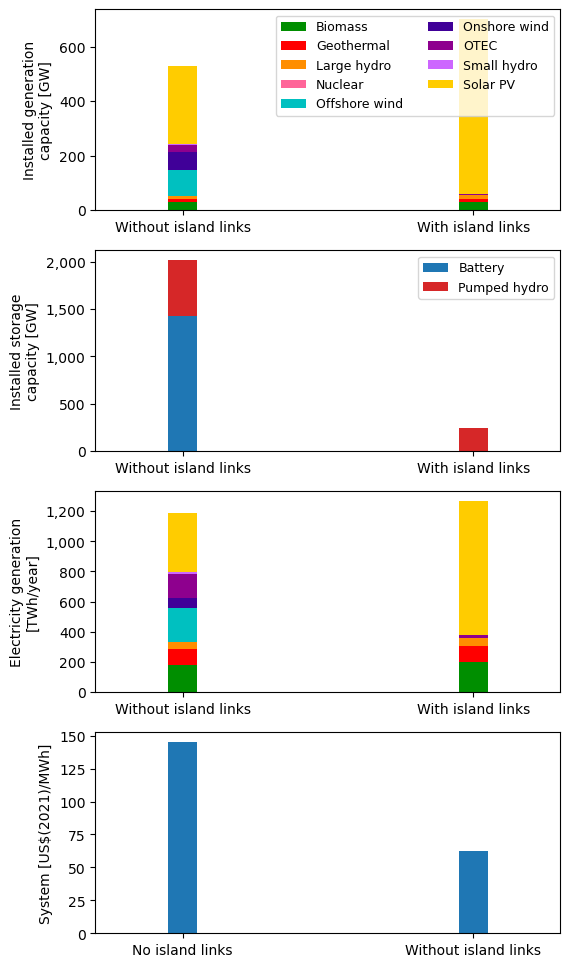

In [28]:
# Here, we create the plots, consisting of 4 rows and 1 column (hence (4,1))

fig, ax = plt.subplots(4,1, figsize=(6,12))
      
# We use stacked bar charts to show the shares per technology

ax[0] = capacity_gen_national_both.T.plot.bar(ax=ax[0], stacked=True, width=0.1, legend=True, color=colours_gen,rot=0)
ax[1] = capacity_stor_national_both.T.plot.bar(ax=ax[1], stacked=True, width=0.1, legend=True, color=colours_stor,rot=0)
ax[2] = generation_national_both.T.plot.bar(ax=ax[2], stacked=True, width=0.1, legend=False, color=colours_gen,rot=0)
ax[3] = system_cost_both.T.plot.bar(ax=ax[3], width=0.1, legend=False, rot=0)

# Settings for figure legends

ax[0].legend(labels=labels_gen,ncol=2,loc='best',fontsize=9)
ax[1].legend(labels=labels_stor,loc='best',fontsize=9)

# Labels and thousands separators
            
ax[0].set_ylabel('Installed generation\ncapacity [GW]')
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax[1].set_ylabel('Installed storage\ncapacity [GW]')
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax[2].set_ylabel('Electricity generation\n[TWh/year]')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax[3].set_ylabel('System [US$(2021)/MWh]')
